# Exploration statistique

In [14]:
%run ./Desu-Step-0-Init.ipynb

# Enrichissement : Ajout des Nutriscores manquants
Seul +- 800 000 / 2 500 000 articles ont un nutriscore
Objectif : Entrainer une Random Forest sur les 800 000 afin de completer le nutriscore des articles où il est manquant 

In [3]:
sql_sub_dtypes = {				  # 'code': 
                                  # 'creator':
                                  # 'product_name':
                                  # 'brands_tags':
                                  # 'categories':
                                  # 'categories_tags':
                                  # 'categories_en':
                                  # 'ingredients_tags':
                                    'nbr_ingredients':np.float32,
                                  # 'additives_tags':
                                    'score_additifs':np.float32,
                                  #  'nbr_additifs':np.int32,
                                  #  'tox_moy_additifs':np.float32,	
                                    'nutriscore_score':np.float32,
                                    'ecoscore_score':np.float32,
                                  #  'main_category':
                                    'energy_kj_100g':np.float32,
                                    'energy_kcal_100g':np.float32,
                                    'energy_100g':np.float32,
                                    'energy_from_fat_100g':np.float32,
                                    'fat_100g':np.float32,
                                    'saturated_fat_100g':np.float32,
                                    'butyric_acid_100g':np.float32,
                                    'caproic_acid_100g':np.float32,
                                    'caprylic_acid_100g':np.float32,
                                    'capric_acid_100g':np.float32,
                                    'lauric_acid_100g':np.float32,
                                    'myristic_acid_100g':np.float32,
                                    'palmitic_acid_100g':np.float32,
                                    'stearic_acid_100g':np.float32,
                                    'arachidic_acid_100g':np.float32,
                                    'behenic_acid_100g':np.float32,
                                    'lignoceric_acid_100g':np.float32,
                                    'cerotic_acid_100g':np.float32,
                                    'montanic_acid_100g':np.float32,
                                    'melissic_acid_100g':np.float32,
                                    'monounsaturated_fat_100g':np.float32,
                                    'polyunsaturated_fat_100g':np.float32,
                                    'omega_3_fat_100g':np.float32,
                                    'alpha_linolenic_acid_100g':np.float32,
                                    'eicosapentaenoic_acid_100g':np.float32,
                                    'docosahexaenoic_acid_100g':np.float32,
                                    'omega_6_fat_100g':np.float32,
                                    'linoleic_acid_100g':np.float32,
                                    'arachidonic_acid_100g':np.float32,
                                    'gamma_linolenic_acid_100g':np.float32,
                                    'dihomo_gamma_linolenic_acid_100g':np.float32,
                                    'omega_9_fat_100g':np.float32,
                                    'oleic_acid_100g':np.float32,
                                    'elaidic_acid_100g':np.float32,
                                    'gondoic_acid_100g':np.float32,
                                    'mead_acid_100g':np.float32,
                                    'erucic_acid_100g':np.float32,
                                    'nervonic_acid_100g':np.float32,
                                    'trans_fat_100g':np.float32,
                                    'cholesterol_100g':np.float32,
                                    'carbohydrates_100g':np.float32,
                                    'sugars_100g':np.float32,
                                    'sucrose_100g':np.float32,
                                    'glucose_100g':np.float32,
                                    'fructose_100g':np.float32,
                                    'lactose_100g':np.float32,
                                    'maltose_100g':np.float32,
                                    'maltodextrins_100g':np.float32,
                                    'starch_100g':np.float32,
                                    'polyols_100g':np.float32,
                                    'fiber_100g':np.float32,
                                    'soluble_fiber_100g':np.float32,
                                    'insoluble_fiber_100g':np.float32,
                                    'proteins_100g':np.float32,
                                    'casein_100g':np.float32,
                                    'serum_proteins_100g':np.float32,
                                    'nucleotides_100g':np.float32,
                                    'salt_100g':np.float32,
                                    'sodium_100g':np.float32,
                                    'alcohol_100g':np.float32,
                                    'vitamin_a_100g':np.float32,
                                    'beta_carotene_100g':np.float32,
                                    'vitamin_d_100g':np.float32,
                                    'vitamin_e_100g':np.float32,
                                    'vitamin_k_100g':np.float32,
                                    'vitamin_c_100g':np.float32,
                                    'vitamin_b1_100g':np.float32,
                                    'vitamin_b2_100g':np.float32,
                                    'vitamin_pp_100g':np.float32,
                                    'vitamin_b6_100g':np.float32,
                                    'vitamin_b9_100g':np.float32,
                                    'folates_100g':np.float32,
                                    'vitamin_b12_100g':np.float32,
                                    'biotin_100g':np.float32,
                                    'pantothenic_acid_100g':np.float32,
                                    'silica_100g':np.float32,
                                    'bicarbonate_100g':np.float32,
                                    'potassium_100g':np.float32,
                                    'chloride_100g':np.float32,
                                    'calcium_100g':np.float32,
                                    'phosphorus_100g':np.float32,
                                    'iron_100g':np.float32,
                                    'magnesium_100g':np.float32,
                                    'zinc_100g':np.float32,
                                    'copper_100g':np.float32,
                                    'manganese_100g':np.float32,
                                    'fluoride_100g':np.float32,
                                    'selenium_100g':np.float32,
                                    'chromium_100g':np.float32,
                                    'molybdenum_100g':np.float32,
                                    'iodine_100g':np.float32,
                                    'caffeine_100g':np.float32,
                                    'taurine_100g':np.float32,
                                    'ph_100g':np.float32,
                                    'fruits_vegetables_nuts_100g':np.float32,
                                    'fruits_vegetables_nuts_dried_100g':np.float32,
                                    'fruits_vegetables_nuts_estimate_100g':np.float32,
                                    'fruits_vegetables_nuts_estimate_from_ingredients_100g':np.float32,
                                    'collagen_meat_protein_ratio_100g':np.float32,
                                    'cocoa_100g':np.float32,
                                    'chlorophyl_100g':np.float32,
                                    'carbon_footprint_100g':np.float32,
                                    'carbon_footprint_from_meat_or_fish_100g':np.float32,
                                    'nutrition_score_fr_100g':np.float32,
                                    'nutrition_score_uk_100g':np.float32,
                                    'glycemic_index_100g':np.float32,
                                    'water_hardness_100g':np.float32,
                                    'choline_100g':np.float32,
                                    'phylloquinone_100g':np.float32,
                                    'beta_glucan_100g':np.float32,
                                    'inositol_100g':np.float32,
                                    'carnitine_100g':np.float32}

In [4]:
debug ("Debut chargement subset openfood fact")
df_food_sub = pd.read_sql_query    ('select '+
                                  # 'code,'+
                                  # 'creator,'+
                                  # 'product_name,'+
                                  # 'brands_tags,'+
                                  # 'categories,'+
                                  # 'categories_tags,'+
                                  # 'categories_en,'+
                                  # 'ingredients_tags,'+
                                    'nbr_ingredients,'+
                                  #  'additives_tags,'+
                                    'score_additifs,'+
                                  #  'nbr_additifs,'+
                                  #  'tox_moy_additifs,'+	
                                    'nutriscore_score,'+
                                    'ecoscore_score,'+
                                  #  'main_category,'+
                                    'energy_kj_100g,'+
                                    'energy_kcal_100g,'+
                                    'energy_100g,'+
                                    'energy_from_fat_100g,'+
                                    'fat_100g,'+
                                    'saturated_fat_100g,'+
                                    'butyric_acid_100g,'+
                                    'caproic_acid_100g,'+
                                    'caprylic_acid_100g,'+
                                    'capric_acid_100g,'+
                                    'lauric_acid_100g,'+
                                    'myristic_acid_100g,'+
                                    'palmitic_acid_100g,'+
                                    'stearic_acid_100g,'+
                                    'arachidic_acid_100g,'+
                                    'behenic_acid_100g,'+
                                    'lignoceric_acid_100g,'+
                                    'cerotic_acid_100g,'+
                                    'montanic_acid_100g,'+
                                    'melissic_acid_100g,'+
                                    'monounsaturated_fat_100g,'+
                                    'polyunsaturated_fat_100g,'+
                                    'omega_3_fat_100g,'+
                                    'alpha_linolenic_acid_100g,'+
                                    'eicosapentaenoic_acid_100g,'+
                                    'docosahexaenoic_acid_100g,'+
                                    'omega_6_fat_100g,'+
                                    'linoleic_acid_100g,'+
                                    'arachidonic_acid_100g,'+
                                    'gamma_linolenic_acid_100g,'+
                                    'dihomo_gamma_linolenic_acid_100g,'+
                                    'omega_9_fat_100g,'+
                                    'oleic_acid_100g,'+
                                    'elaidic_acid_100g,'+
                                    'gondoic_acid_100g,'+
                                    'mead_acid_100g,'+
                                    'erucic_acid_100g,'+
                                    'nervonic_acid_100g,'+
                                    'trans_fat_100g,'+
                                    'cholesterol_100g,'+
                                    'carbohydrates_100g,'+
                                    'sugars_100g,'+
                                    'sucrose_100g,'+
                                    'glucose_100g,'+
                                    'fructose_100g,'+
                                    'lactose_100g,'+
                                    'maltose_100g,'+
                                    'maltodextrins_100g,'+
                                    'starch_100g,'+
                                    'polyols_100g,'+
                                    'fiber_100g,'+
                                    'soluble_fiber_100g,'+
                                    'insoluble_fiber_100g,'+
                                    'proteins_100g,'+
                                    'casein_100g,'+
                                    'serum_proteins_100g,'+
                                    'nucleotides_100g,'+
                                    'salt_100g,'+
                                    'sodium_100g,'+
                                    'alcohol_100g,'+
                                    'vitamin_a_100g,'+
                                    'beta_carotene_100g,'+
                                    'vitamin_d_100g,'+
                                    'vitamin_e_100g,'+
                                    'vitamin_k_100g,'+
                                    'vitamin_c_100g,'+
                                    'vitamin_b1_100g,'+
                                    'vitamin_b2_100g,'+
                                    'vitamin_pp_100g,'+
                                    'vitamin_b6_100g,'+
                                    'vitamin_b9_100g,'+
                                    'folates_100g,'+
                                    'vitamin_b12_100g,'+
                                    'biotin_100g,'+
                                    'pantothenic_acid_100g,'+
                                    'silica_100g,'+
                                    'bicarbonate_100g,'+
                                    'potassium_100g,'+
                                    'chloride_100g,'+
                                    'calcium_100g,'+
                                    'phosphorus_100g,'+
                                    'iron_100g,'+
                                    'magnesium_100g,'+
                                    'zinc_100g,'+
                                    'copper_100g,'+
                                    'manganese_100g,'+
                                    'fluoride_100g,'+
                                    'selenium_100g,'+
                                    'chromium_100g,'+
                                    'molybdenum_100g,'+
                                    'iodine_100g,'+
                                    'caffeine_100g,'+
                                    'taurine_100g,'+
                                    'ph_100g,'+
                                    'fruits_vegetables_nuts_100g,'+
                                    'fruits_vegetables_nuts_dried_100g,'+
                                    'fruits_vegetables_nuts_estimate_100g,'+
                                    'fruits_vegetables_nuts_estimate_from_ingredients_100g,'+
                                    'collagen_meat_protein_ratio_100g,'+
                                    'cocoa_100g,'+
                                    'chlorophyl_100g,'+
                                    'carbon_footprint_100g,'+
                                    'carbon_footprint_from_meat_or_fish_100g,'+
                                    'nutrition_score_fr_100g,'+
                                    'nutrition_score_uk_100g,'+
                                    'glycemic_index_100g,'+
                                    'water_hardness_100g,'+
                                    'choline_100g,'+
                                    'phylloquinone_100g,'+
                                    'beta_glucan_100g,'+
                                    'inositol_100g,'+
                                    'carnitine_100g'+
                                    ' from desu.food where nutriscore_score !="nan" ',db,dtype = sql_sub_dtypes)

debug("Taille du dataframe après chargement:"+str(round(df_food_sub.memory_usage().sum() / (1024**2),1))+"Mo") #converting to megabyte
debug ("shape du dataframe :"+str(df_food_sub.shape))

# debug("Remplacement des nan par la valeur 0")
# df_food_sub.replace(['nan'],0)


df_food_sub.head(10)

2022-06-07 21:19:44 Debug -> Debut chargement subset openfood fact
2022-06-07 21:24:55 Debug -> Taille du dataframe après chargement:346.3Mo
2022-06-07 21:24:55 Debug -> shape du dataframe :(782567, 116)


,nbr_ingredients,score_additifs,nutriscore_score,ecoscore_score,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,fruits_vegetables_nuts_dried_100g,fruits_vegetables_nuts_estimate_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
0,3.0,NaN,18.0,55.0,936.0,NaN,936.0,NaN,8.2,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.1,NaN,NaN,NaN,4.600,1.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,78.0,NaN,32.0,134.0,NaN,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,0.420,0.1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,14.0,NaN,NaN,381.0,1594.0,NaN,22.0,15.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.299999,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,NaN,NaN,4.6,NaN,NaN,NaN,0.100,0.0400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-2.0,76.0,NaN,157.0,657.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,0.6,NaN,NaN,NaN,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Na

In [4]:
df_food_sub.describe()

,nbr_ingredients,score_additifs,nutriscore_score,ecoscore_score,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,fruits_vegetables_nuts_dried_100g,fruits_vegetables_nuts_estimate_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
count,523770.000000,313396.000000,782567.000000,398660.000000,1.368250e+05,7.434090e+05,7.803890e+05,857.000000,7.803520e+05,780299.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41259.000000,41207.00000,1946.000000,0.0,0.0,0.0,465.000000,0.0,0.0,0.0,0.0,96.000000,0.0,0.0,0.0,0.0,0.0,0.0,231242.000000,235602.000000,780056.000000,780328.000000,0.0,0.0,0.0,0.0,0.0,0.0,513.000000,2887.000000,431598.000000,3417.000000,3185.000000,780347.000000,8.000000,51.000000,27.000000,780749.000000,780749.000000,1.403300e+04,184645.000000,56.000000,8.428000e+03,2914.000000,801.000000,188388.000000,19987.000000,19514.000000,19433.000000,12314.000000,8899.000000,7294.000000,9.809000e+03,717.000000,4347.000000,169.000000,451.000000,80676.000000,621.000000,238711.000000,11639.000000,233029.000000,12391.000000,8407.000000,3651.000000,3314.000000,239.000000,1816.000000,130.000000,257.000000,1666.000000,400.000000,150.000000,234.000000,8601.000000,819.000000,11368.000000,524006.000000,272.000000,6356.000000,3.000000,377.000000,9976.000000,782567.000000,2.00000,4.000000,2.000000,14.000000,1483.000000,40.000000,22.000000,3.000000
mean,25.328192,8.147782,9.090496,42.243164,1.718025e+03,2.904516e+02,1.312578e+03,306.291595,1.281484e+12,5.886427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.742351,5.30533,5.678379,NaN,NaN,NaN,13.880229,NaN,NaN,NaN,NaN,24.558664,NaN,NaN,NaN,NaN,NaN,NaN,0.070742,0.046336,28.722973,12.675139,NaN,NaN,NaN,NaN,NaN,NaN,27.267653,24.204012,3.093187,2.346588,4.245009,8.629950,250.115417,31.962381,22.772911,1.473016,0.589225,4.758775e+04,0.564624,0.758818,1.134228e-01,0.723824,0.387577,0.032285,0.744711,0.099239,0.469381,0.359988,0.899238,0.035541,8.273102e-02,0.961887,0.546827,1.030571,1.371783,0.604855,0.994803,0.239061,1.049327,0.012653,0.474705,0.097038,0.015771,0.012291,0.074728,1.497970,512.962769,2.938221,2.525839,2.377298,72.666107,6.705842,35.078724,16.701687,46.451508,9.267420,15

In [5]:
# % de NaN par colonne
# df_food_sub.replace(' ',np.nan,inplace=True)
# df_food_sub.replace('',np.nan,inplace=True)
print ("Liste des colonnes dont le teux de NaN <> de 100%")
for col in df_food_sub :
    rate = round((df_food_sub[col].isna().sum()/len(df_food_sub))*100)
    if rate <90 :
        print (str(col)+":"+str(rate))

Liste des colonnes dont le teux de NaN <> de 100%
nbr_ingredients:33
score_additifs:60
nutriscore_score:0
ecoscore_score:49
energy_kj_100g:83
energy_kcal_100g:5
energy_100g:0
fat_100g:0
saturated_fat_100g:0
trans_fat_100g:70
cholesterol_100g:70
carbohydrates_100g:0
sugars_100g:0
fiber_100g:45
proteins_100g:0
salt_100g:0
sodium_100g:0
vitamin_a_100g:76
vitamin_c_100g:76
calcium_100g:69
iron_100g:70
fruits_vegetables_nuts_estimate_from_ingredients_100g:33
nutrition_score_fr_100g:0


In [7]:

print ("Liste des colonnes dont le taux de NaN <> de 100%")
for col in df_food_sub :
    rate = round((df_food_sub[col].isna().sum()/len(df_food_sub))*100)
    if rate ==0 :
        print (str(col)+":"+str(rate))

Liste des colonnes dont le taux de NaN <> de 100%
nutriscore_score:0
energy_100g:0
fat_100g:0
saturated_fat_100g:0
carbohydrates_100g:0
sugars_100g:0
proteins_100g:0
salt_100g:0
sodium_100g:0
nutrition_score_fr_100g:0


In [5]:
df_food_reg=df_food_sub[["nutriscore_score","energy_100g","fat_100g",
                         "saturated_fat_100g","carbohydrates_100g",
                         "sugars_100g","proteins_100g","salt_100g",
                         "sodium_100g","nutrition_score_fr_100g"]]

In [6]:
# Supression de certaines lignes dont une des valeur est à null
df_food_reg[df_food_reg["energy_100g"].isna()]


,nutriscore_score,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
1012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5163,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11173,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
781901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
782086,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
782293,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
782383,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
df_food_sub.shape

(782567, 116)

In [8]:
df_food_reg = df_food_reg.dropna()

In [9]:
df_food_reg.shape

(779801, 10)

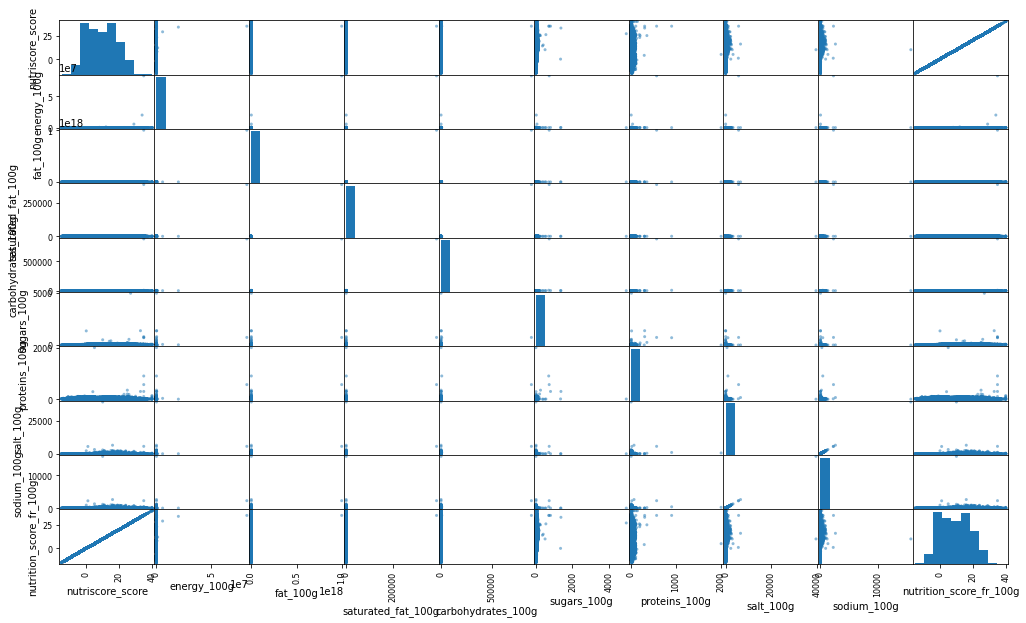

In [10]:
pd.plotting.scatter_matrix(df_food_reg,figsize=(17,10));

# Estimation des temps d'entrainement
présuppose la linéarité en fonction de la taille n du dataset

x_plt = []
y_plt = []
output = pd.dataframe 

param_grid_rf = {'max_depth': range(2,5), # profondeur
                 'min_samples_split': [2,4], #,6,8,10], # nombre de y minimum pour tenter une subdivision
                 'max_features':np.linspace(0.1,1,8) #Fraction de variables à chaque noeud choisi aléatoirement
             }
# params = ParameterGrid(param_grid_rf) #permet d'obtenir la liste des hyper param de la grid search

rf_class = RFC(n_estimators=100,random_state=1234,n_jobs=4)  #On laisse 100 arbres pour ne pas faire exploser le tps 
#de calcul

grid_search_rf = GridSearchCV(rf_class, # le modèle
                          param_grid_rf, # la grille de paramètres 
                          scoring = "accuracy", # le KPI de scoring
                          return_train_score=True,
                          cv = 2,n_jobs=7,verbose=1) # j'ai mis 8, c'est pê un peu extrême # cv = kfold de cross validation
#sur les machines AMU...

for size in range(1000,10000,1000) :
    debug ("Début d'entrainement avec {s} lignes ".format(s=size))
  
    df=df_food_sub.sample (n=size,replace = True)
    #filename = filepath_out+"nutriscore"+str(size)+".csv"
    # df_food_reg.to_csv (filename,sep=";")
    
    y = df_food_reg["nutriscore_score"]
    X = df_food_reg.drop("nutriscore_score",axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) # 
    
    ts = datetime.datetime.now()
  
    grid_search_rf.fit(X_train, y_train) # cross-validation sur toutes les combinaisons d'hyperparamètres
    et = (datetime.datetime.now()-ts).total_seconds()
    
    x_plt.append(size)
    y_plt.append(et)
    
    debug ("Fin d'entrainement avec {s} lignes : temps d'execution : {t} ".format(s=size,t=et))

    

In [67]:
tocsv=pd.DataFrame()

param_grid_rf = {'max_depth': range(2,5), # profondeur
                 'min_samples_split': [2,4], #,6,8,10], # nombre de y minimum pour tenter une subdivision
                 'max_features':np.linspace(0.1,1,8) #Fraction de variables à chaque noeud choisi aléatoirement
             }
# params = ParameterGrid(param_grid_rf) #permet d'obtenir la liste des hyper param de la grid search

rf_class = RFC(n_estimators=100,random_state=1234,n_jobs=7)  #On laisse 100 arbres pour ne pas faire exploser le tps 
#de calcul

grid_search_rf = GridSearchCV(rf_class, # le modèle
                          param_grid_rf, # la grille de paramètres 
                          scoring = "accuracy", # le KPI de scoring
                          return_train_score=True,
                          cv = 2,n_jobs=7,verbose=1) # j'ai mis 8, c'est pê un peu extrême # cv = kfold de cross validation
#sur les machines AMU...

best_params_rf = {'max_depth': 6,
 'max_features': 0.7333333333333334,
 'min_samples_split': 6}

for size in range(1000,10000,1000) :
    debug ("Début d'entrainement avec {s} lignes ".format(s=size))
    
    debug ("Echantillonage de {s} lignes depuis le dataset".format(s=size))
    df=df_food_sub.sample (n=size,replace = True)

    debug("Suppression de y")
    y = df_food_reg["nutriscore_score"]
    X = df_food_reg.drop("nutriscore_score",axis=1)
    
    debug("Split entre jeu d'entrainement et jeu de test ")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123) #
    
    debug("Grid search fiting")
    ts = datetime.datetime.now()
    # grid_search_rf.fit(X_train, y_train) # cross-validation sur toutes les combinaisons d'hyperparamètres
    gs_et = (datetime.datetime.now()-ts).total_seconds()
    debug ("Fin gridsearch avec {s} lignes : temps d'execution : {t} ".format(s=size,t=gs_et))
    
    debug ("re - entrainement avec les meilleurs hypers paramètres trouvés :")
    # best_params_rf = grid_search_rf.best_params_
    ts = datetime.datetime.now()
    #rf_class = RFC(n_estimators=500,max_depth=best_params_rf["max_depth"],min_samples_split=best_params_rf["min_samples_split"],
    #               max_features=best_params_rf["max_features"],random_state=1234,
    #               oob_score=True)

    # rf_class.fit(X_train, y_train)
    tr_et = (datetime.datetime.now()-ts).total_seconds()
    debug ("Fin ré_entrainement avec {s} lignes : temps d'execution : {t} ".format(s=size,t=tr_et))
    
    debug ("Prediction sur le jeux de test")
    ts = datetime.datetime.now()
    # y_hat_RF = rf_class.predict(X_test)
    ts_et = (datetime.datetime.now()-ts).total_seconds()
    debug ("Fin prédiction avec {s} lignes : temps d'execution : {t} ".format(s=size,t=ts_et))
    
    debug("Sauvegarde des hypers paramètres pour le subset {s} lignes".format(s=size))
   # best_params_rf ["Accuracy"]=100*np.mean(y_test==y_hat_RF)
   # best_params_rf ["Précision"]=precision_score(y_test,y_hat_RF)
   # best_params_rf ["Rappel"]=recall_score(y_test,y_hat_RF)
   # best_params_rf ["F1"]=f1_score(y_test,y_hat_RF)
   # best_params_rf ["grid_search_exec_time"] = gs_et
   # best_params_rf ["train_exec_time"] = tr_et
   # best_params_rf ["test_exec_time"] = ts_et
   # best_params_rf ["nbr_lignes"] = size
    
    best_params_rf ["Accuracy"]=100
    best_params_rf ["Précision"]=10
    best_params_rf ["Rappel"]=5
    best_params_rf ["F1"]=3
    best_params_rf ["grid_search_exec_time"] = gs_et
    best_params_rf ["train_exec_time"] = tr_et
    best_params_rf ["test_exec_time"] = ts_et
    best_params_rf ["nbr_lignes"] = size
    
    tocsv=tocsv.append(pd.DataFrame([best_params_rf], columns=best_params_rf.keys()))
    debug (" ")

tocsv.to_csv(filepath_out+"hyperparam.csv",sep=";")

2022-06-08 09:57:29 Debug -> Début d'entrainement avec 1000 lignes 
2022-06-08 09:57:29 Debug -> Echantillonage de 1000 lignes depuis le dataset
2022-06-08 09:57:29 Debug -> Suppression de y
2022-06-08 09:57:29 Debug -> Split entre jeu d'entrainement et jeu de test 
2022-06-08 09:57:29 Debug -> Grid search fiting
2022-06-08 09:57:29 Debug -> Fin gridsearch avec 1000 lignes : temps d'execution : 0.0 
2022-06-08 09:57:29 Debug -> re - entrainement avec les meilleurs hypers paramètres trouvés :
2022-06-08 09:57:29 Debug -> Fin ré_entrainement avec 1000 lignes : temps d'execution : 0.0 
2022-06-08 09:57:29 Debug -> Prediction sur le jeux de test
2022-06-08 09:57:29 Debug -> Fin prédiction avec 1000 lignes : temps d'execution : 0.0 
2022-06-08 09:57:29 Debug -> Sauvegarde des hypers paramètres pour le subset 1000 lignes
2022-06-08 09:57:29 Debug ->  
2022-06-08 09:57:29 Debug -> Début d'entrainement avec 2000 lignes 
2022-06-08 09:57:29 Debug -> Echantillonage de 2000 lignes depuis le datas